***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/spk-core-certified-user/blob/main/README.md) >

## Splunk
###### Topic: ``Core Certified User``
***

<a id="top"></a>
***
## Table of Contents
***

### [Search Optimization](#SearchOptimization) <br/><br/>

- [Data Model Acceleration](#SearchOptimizatione) <br/><br/> 

<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="SearchOptimization"></a>
***
### Search Optimization
***

< [Table of Contents](#top) | [References](#references) >
<a id="SearchOptimizatione"></a>
***
###### Data Model Acceleration
***

Data Model Acceleration works a little like report acceleration, in that files are created and accessed to return search results. 

In Data Model Acceleration, this is called a ``High-Performance Analytics Store``. 

There are two types of Data Model Acceleration: 

- Adhoc


- Persistent

Takes place automatically whenever a user runs a pivot on a data model that has not been persistently accelerated. 

The files that are created for the acceleration are stored on a search head and only exist while the user is actively using the pivot tool.

By default, when you first access the pivot tool, it will automatically run over all time, which means your initial acceleration will include all of the data in your index defined by your data model constraints.

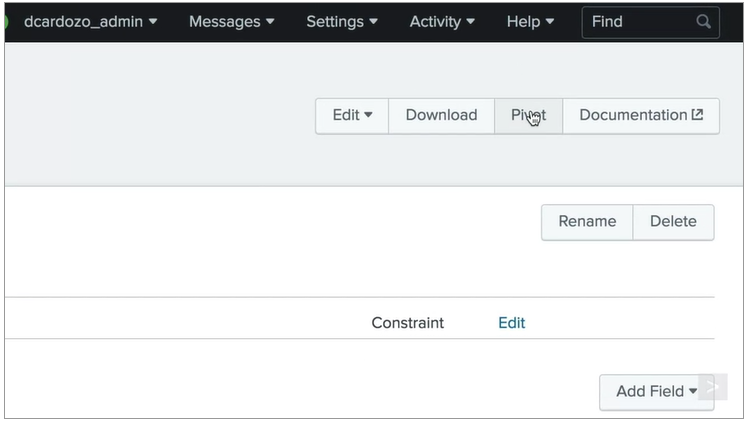

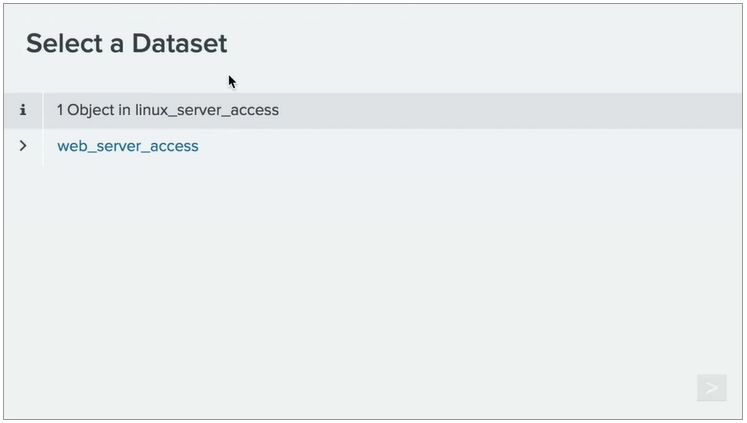

With this much data being accessed, the initial pivot will complete slowly as the acceleration summary is built.

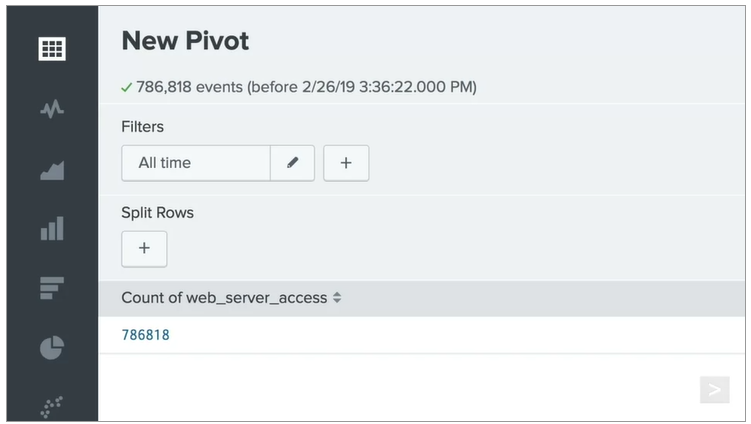

After the initial build, the pivot editor will use the summary for further actions taken in the editor and will rebuild the summary to match the time filter selected, causing pivot performance to improve as the pivot editor is being accessed.

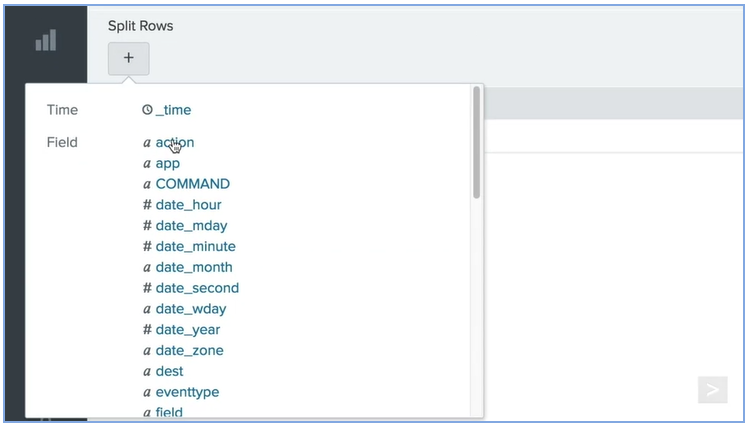

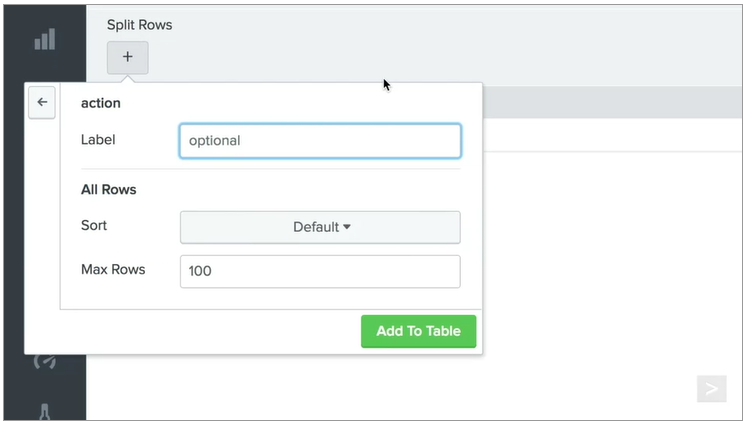

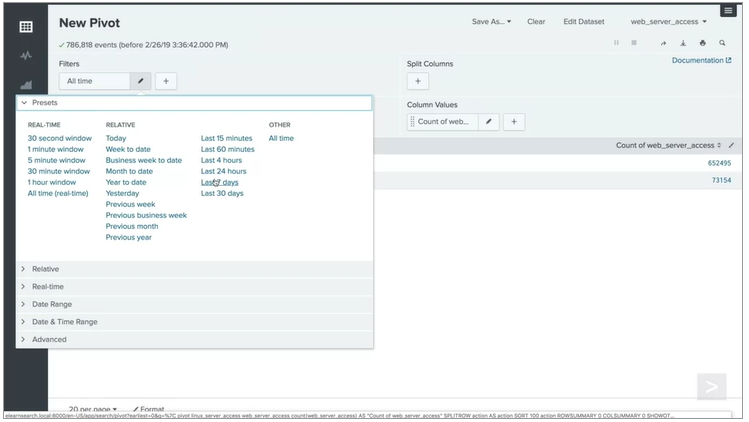

**While the pivot editor will use the summary data, reports created in the pivot editor will not.**

As you can imagine, having multiple users running ad hoc acceleration could tax your deployment. 

To address this issue, Splunk allows us to define persistent data model acceleration. 

The files created for a persistent acceleration are stored alongside buckets on the indexers and exist as long as the data model exists. 

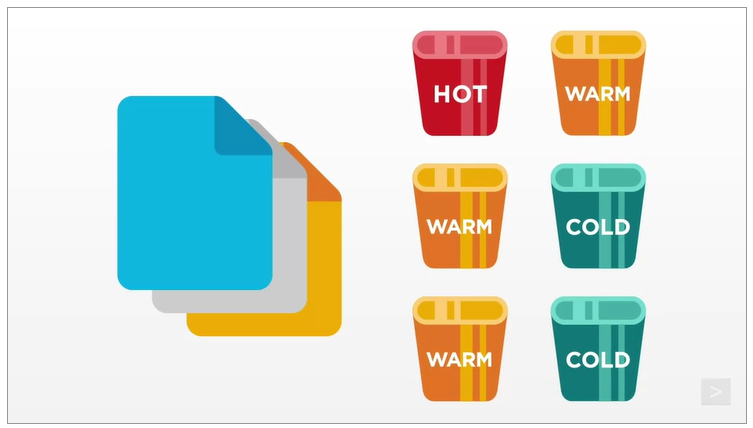

They can be scoped to particular time ranges and are maintained on an ongoing basis. 

Summaries for persistently accelerated data can be used by all users, where ad hoc summaries only apply to one user.

There are some restrictions when creating a persistent data model acceleration. 

- A user with the ``accelerate_datamodel`` privilege or an admin role is required. 

**Private data models cannot be accelerated - once the data model has been accelerated, it cannot be edited. While all data model datasets can benefit from ad hoc acceleration, only event dataset hierarchies and search dataset hierarchies based on root search datasets that only include streaming commands can be persistently accelerated.**

While all of this sounds complicated, accelerating a data model is incredibly simple. 

Select settings and click on "Data models".

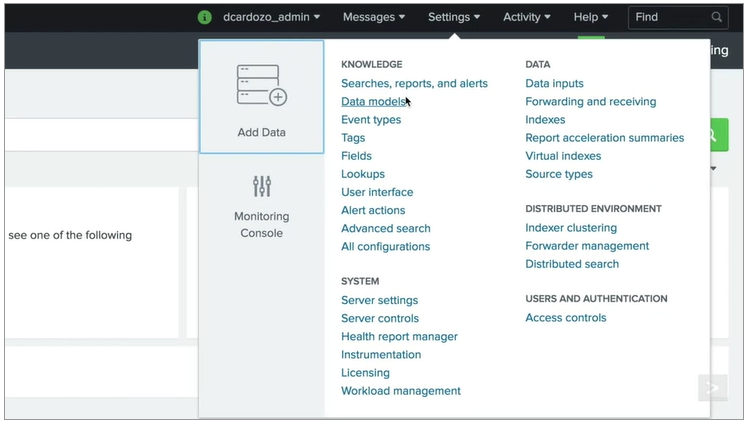

The lightning bolt will tell us if a data model is accelerated or not. 

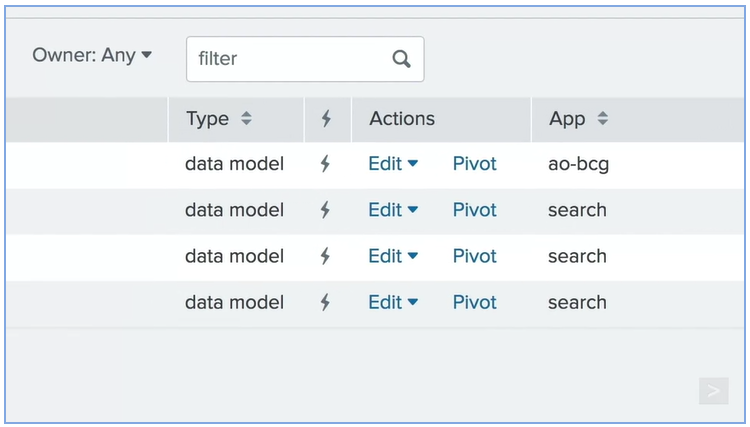

As you can see, the ``linux_server_access`` data model is not currently accelerated.

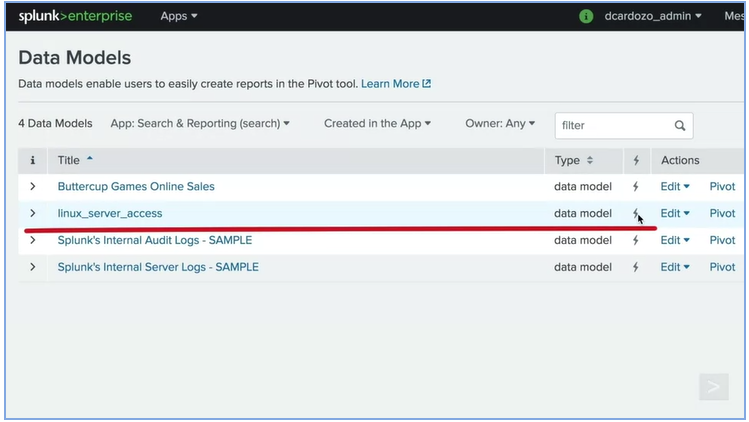

If it was, the lightning bolt would be lit up.

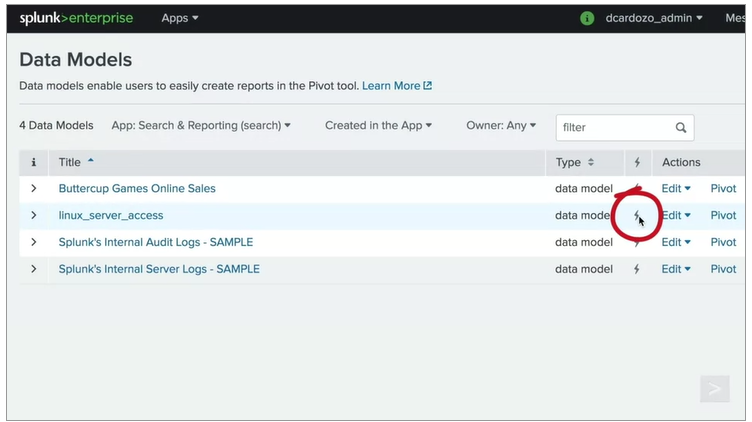

Selecting edit, we have the option to edit acceleration.

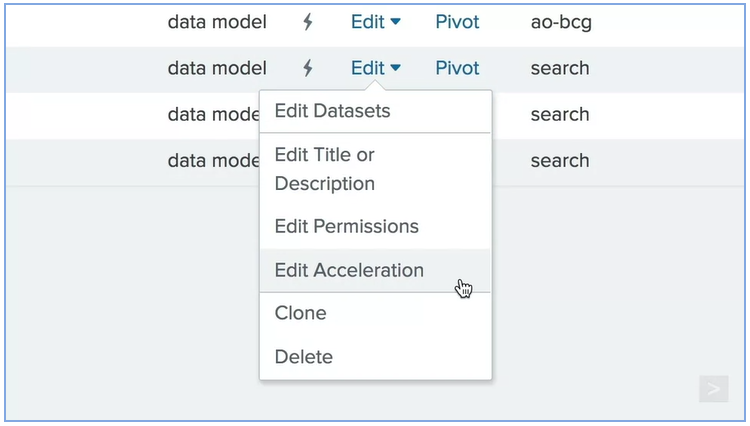

Clicking on it, we select the ``Accelerate`` checkbox and choose a summary range. We know our users will not need to search more than a few months of data at a time, so we select three months. 

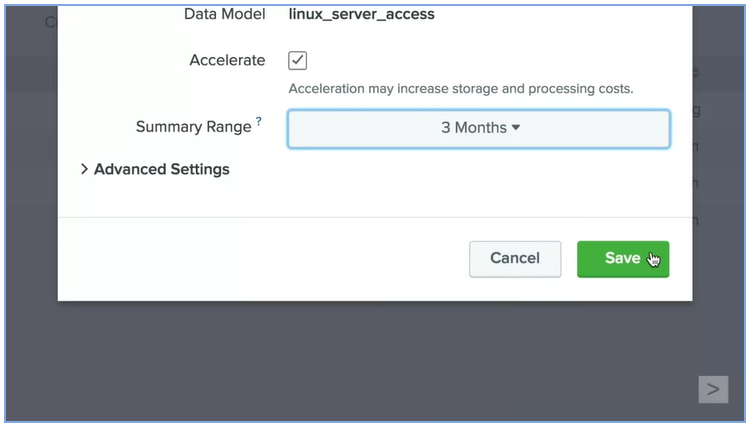

There are some advanced settings options. These should only be used if you are experiencing summary creation issues, so we will leave them alone. 

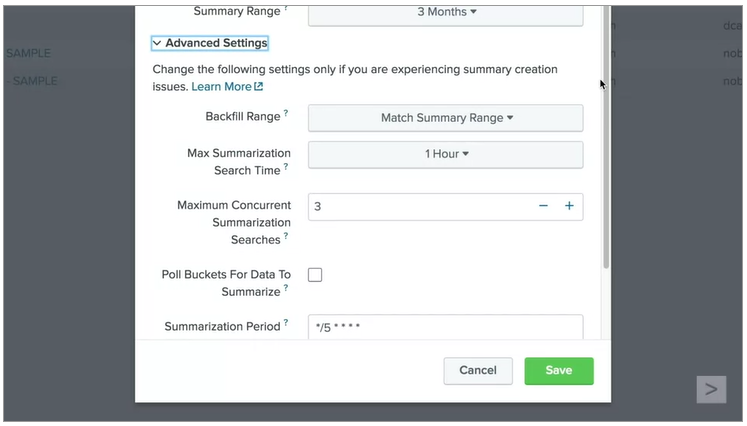

Finally, we click ``Save`` - can see that our data model is now accelerated:

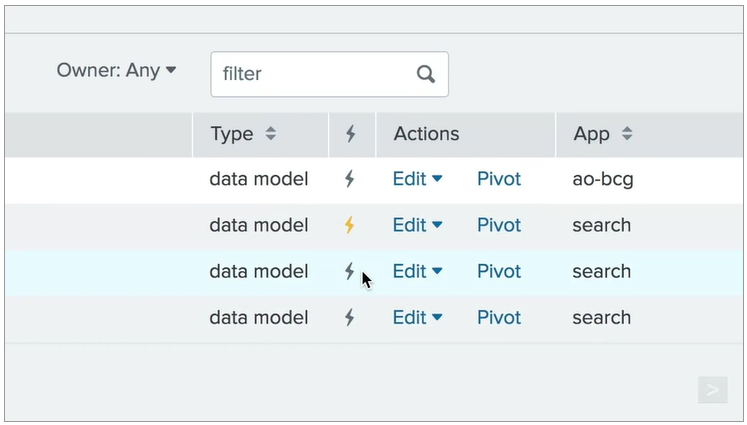

Can see details about the about the acceleration.

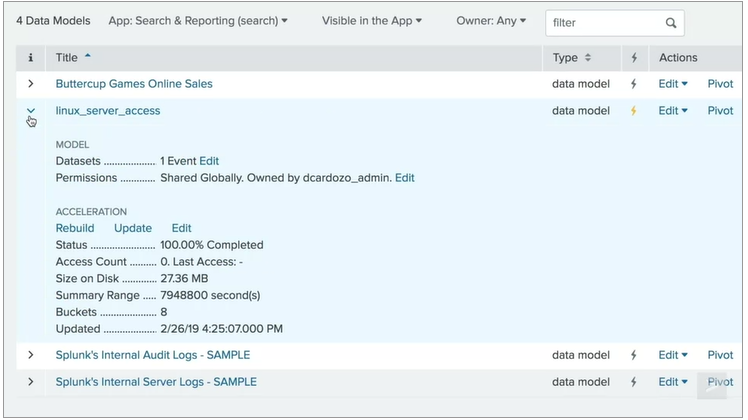

When we click ``Pivot``:

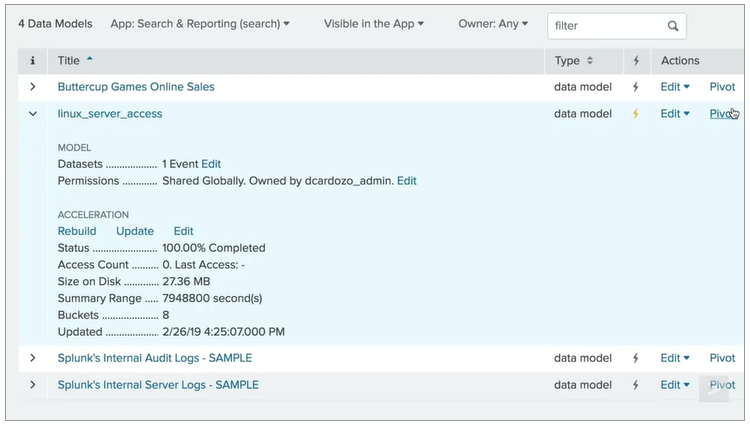

Results are returned much quicker than before.

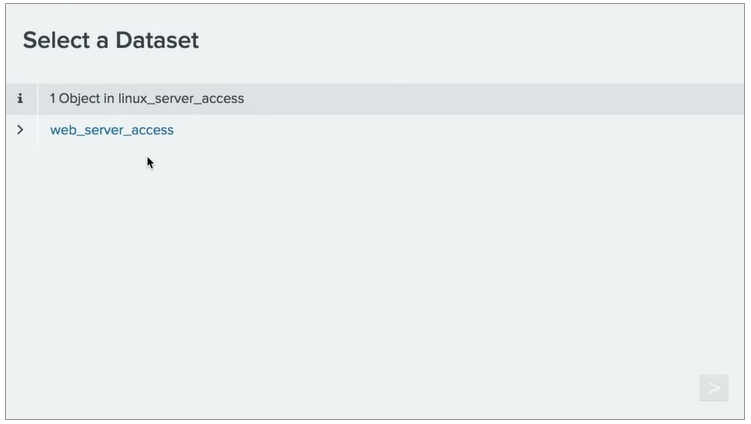

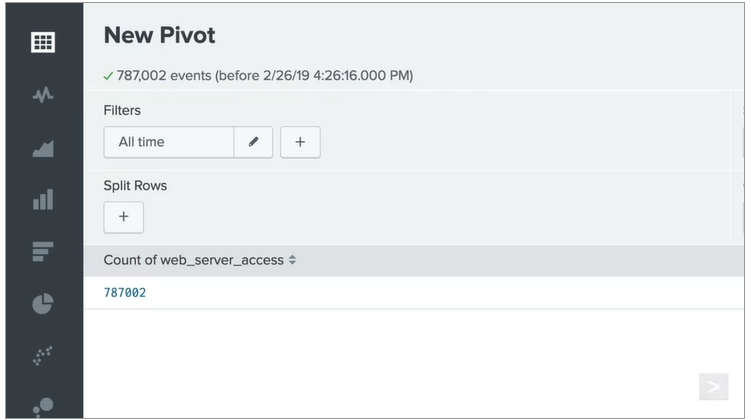

Any report saved using the data model will also benefit from the acceleration.

> Time-Series Index Files - ``Tsidx``

Files that are created for the Data Model Acceleration are called Time-Series Index Files (``TSIDX``).

While they allow us to accelerate data models, they actually play a big role in Splunk search in general.

When data is indexed into Splunk, several files are created in the hot bucket, including raw data files and ``TSIDX`` files. 

``TSIDX`` files include two main components:

- The Lexicon 


- The Posting List.

The ``Lexicon`` is an alphanumeric ordered list of terms found in the data at index time. 

The ``Posting`` list is an array of pointers that match each term to events in the raw data files. 

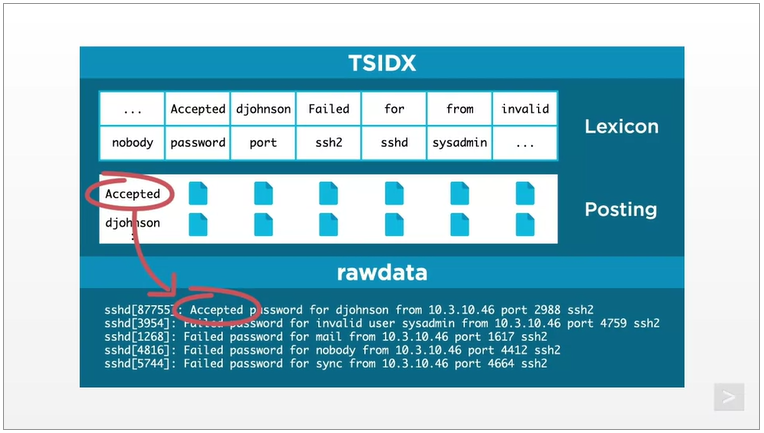

Any fields that are extracted at index time show up as key-value pairs in the Lexicon. 

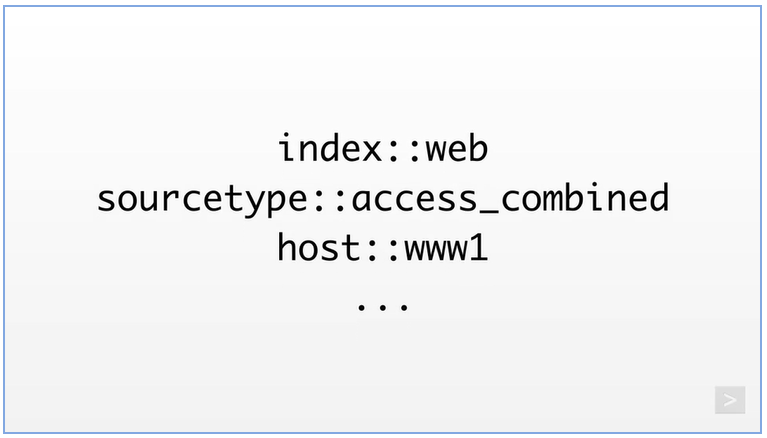

You can think of ``TSIDX`` as a very complex index for a book where every word included in the book is found in the index.

When a search is run, Splunk searches the lexicon inside ``TSIDX`` files for the supplied terms. 

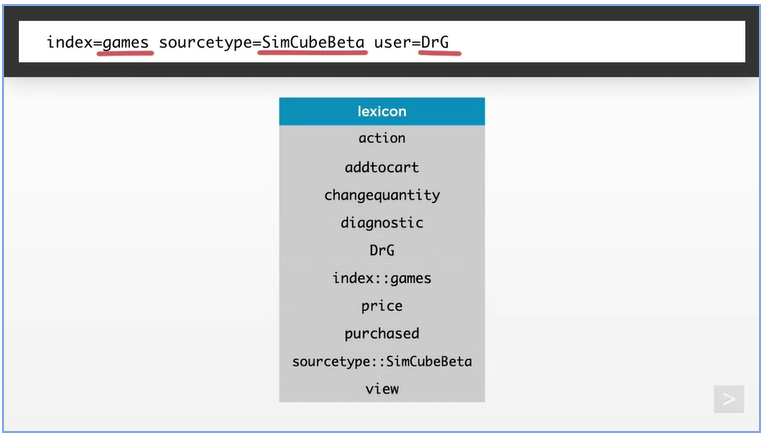

It then uses the pointers to only open and read the raw event data matching the terms, causing your search to be much faster than if it had to search just raw data.

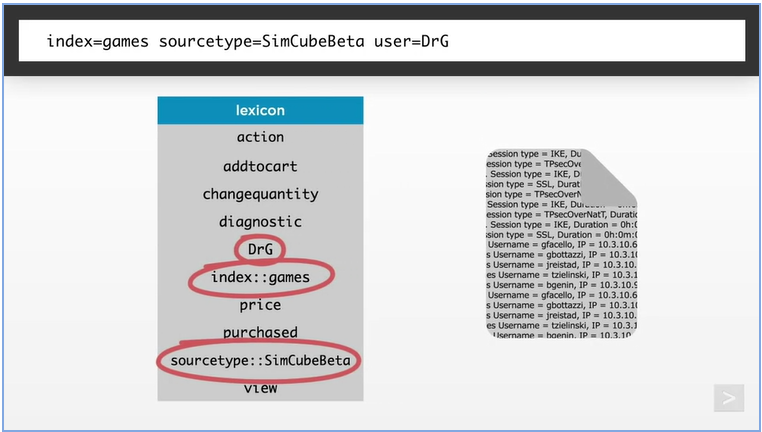

This building of ``TSIDX`` files also happens when a data model is accelerated:

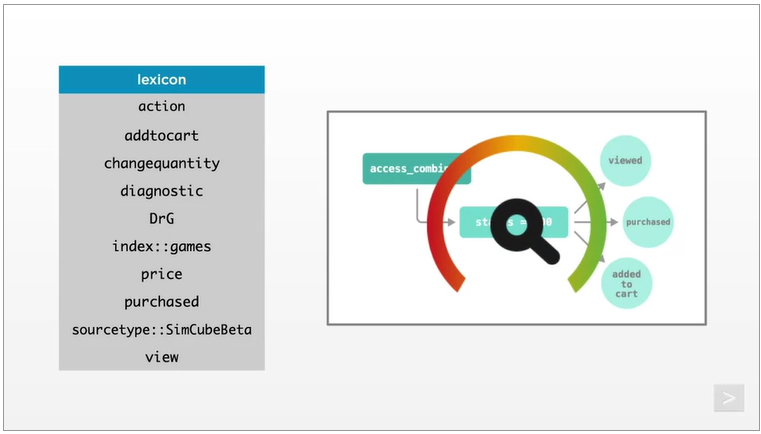

With key-value pairs from the model being added to the lexicon. 

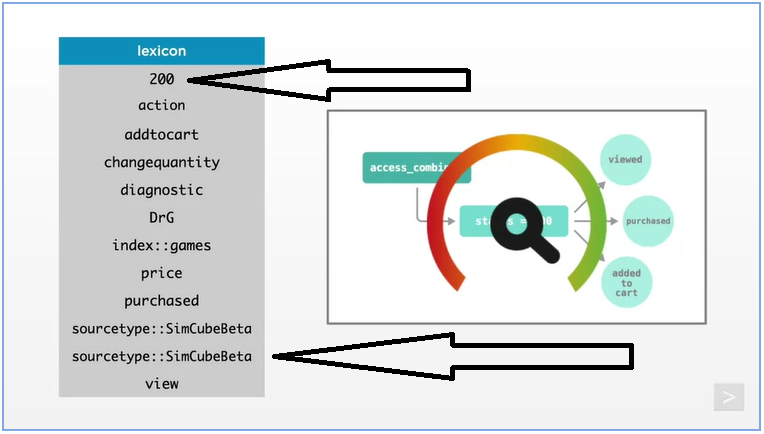

Ad hoc acceleration creates ``TSIDX`` files for the data being accessed on the search head while the summary is built. 

These files will only last while a user is in the pivot editor.

When the summary is built for a persistent acceleration, ``TSIDX`` Files are placed parallel to the buckets that contain the events referenced in the file and which cover the range of time for the summary. 

These files will be updated every five minutes and outdated files will be removed every 30 minutes.

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Splunk, "Splunk Education Portal," [education.splunk.com](https://education.splunk.com/), n.d..

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [1]:
from IPython.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK